<a href="https://colab.research.google.com/github/VindhyaSRajan/Master-s-Thesis/blob/master/Amazon_DataAnalysis_LawnAndGarden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##All the imports go here

In [0]:
import re # We clean text using regex
import csv # To read the csv
from collections import defaultdict # For accumlating values
from nltk.corpus import stopwords # To remove stopwords
from gensim import corpora # To create corpus and dictionary for the LDA model
from gensim.models import LdaModel # To use the LDA model
import pandas as pd

In [0]:
import nltk
nltk.download('stopwords') #In order to remove the stopwords from the corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Reading the Amazon Product file

In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [0]:
#First, we need to upload it to Gdrive
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving reviews_Patio_Lawn_and_Garden.json.gz to reviews_Patio_Lawn_and_Garden.json (2).gz
User uploaded file "reviews_Patio_Lawn_and_Garden.json.gz" with length 199689225 bytes


In [0]:
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')



##Inspecting the Amazon Product Data

In [0]:
df = getDF('/content/reviews_Patio_Lawn_and_Garden.json (2).gz')

df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
993485,A2G7RZI15ZPCTH,B00LW2Z4NS,Ever,"[0, 0]",And I totally dig the look myself. The configu...,5.0,Everyone likes it!,1405641600,"07 18, 2014"
993486,A2V247ZQT9OJIT,B00LW2Z4NS,Natalia,"[0, 0]",Just bought this for my outdoor patio and I lo...,5.0,Beautiful set,1405900800,"07 21, 2014"
993487,AF30DHAVSYNZ0,B00LW2Z4NS,Sasha DLH,"[0, 0]",I've purchased this because the size and confi...,5.0,Comfy Chaise!,1405641600,"07 18, 2014"
993488,A34KTJ4VWNBOHI,B00LW2Z4NS,Stina,"[0, 0]",This chaise is perfect for the entire family. ...,5.0,Great for the Entire Family,1405900800,"07 21, 2014"
993489,A4XPE5UGK51IA,B00LW2Z4NS,Tia Scott,"[0, 0]",This chaise is really making our summer right ...,5.0,Really glad I bought this,1405900800,"07 21, 2014"


In [0]:
df.to_csv('reviews_samples.csv')
!cp reviews_samples.csv drive/My\ Drive/

In [0]:
df = pd.read_csv('/content/drive/My Drive/reviews_samples.csv', nrows = 100000)

In [0]:
df.tail(5)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
99995,99995,AWEZJAVAFA1FM,B000637NQU,Brad GK,"[1, 1]","Worked great this winter, kept ice from area o...",5.0,Worked great,1366243200,"04 18, 2013"
99996,99996,A1TX7W20R3JAZY,B000637NQU,Brenda J Anderson,"[0, 0]",According to the write up this was to keep our...,1.0,Didnt do the job,1365292800,"04 7, 2013"
99997,99997,A1QK5F6DBSTAXO,B000637NQU,Brian430,"[0, 0]",I would not recommend this heater to anyone. I...,1.0,Worst pond heater ever,1387238400,"12 17, 2013"
99998,99998,A2AV9935D0N72O,B000637NQU,"buffalochip ""chip""","[2, 2]",Keeps hole open in ice. If you have a heavy sn...,4.0,works for me,1294358400,"01 7, 2011"
99999,99999,A1SOIZ1VODXIJ6,B000637NQU,bugmuse,"[1, 1]",When I decided on this pond heater - I'm think...,5.0,100 watts VS 1250 watts,1332115200,"03 19, 2012"


In [0]:
list(df.columns.values)

['Unnamed: 0',
 'reviewerID',
 'asin',
 'reviewerName',
 'helpful',
 'reviewText',
 'overall',
 'summary',
 'unixReviewTime',
 'reviewTime']

In [0]:
df = df.drop(columns=['reviewerName', 'asin','helpful','unixReviewTime','reviewTime','reviewerID','summary'])
#df = df.drop(columns='summary') #Do it with the above drop.Had to re-do it as I had forgotten it in the above step

In [0]:
df.head(5)
#df.dtypes
#type(df.reviewText)

,Unnamed: 0,reviewText,overall
0,0,This was a gift for my other husband. He's ma...,5.0
1,1,"My husband rarely asks for anything specific, ...",5.0
2,2,This guy knows his stuff. I love the seriously...,5.0
3,3,"THIS CAN BE FOUND AT: [...] FOR $19.99, also a...",5.0
4,4,Quite good particularly for inspiration (DVD g...,5.0


In [0]:
df_stats = df.groupby(['overall']).size() #Get number of reviews per rating level
df_stats.head()

overall
1.0    11308
2.0     5527
3.0     7746
4.0    18358
5.0    57061
dtype: int64

In [0]:
print(df.groupby('overall')['reviewText'].nunique())

overall
1.0    11303
2.0     5522
3.0     7740
4.0    18341
5.0    56976
Name: reviewText, dtype: int64


In [0]:
df_reviews = df[['reviewText']]
df_reviews.head()

,reviewText
0,This was a gift for my other husband. He's ma...
1,"My husband rarely asks for anything specific, ..."
2,This guy knows his stuff. I love the seriously...
3,"THIS CAN BE FOUND AT: [...] FOR $19.99, also a..."
4,Quite good particularly for inspiration (DVD g...


In [0]:
for i, j in df_reviews.iterrows(): 
    print(i, j) 
    print(df_reviews.dtypes) 

In [0]:
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re  
from nltk.corpus import stopwords
stops1 = set(stopwords.words("english"))

def clean_sent(sent):
    sent = sent.lower()
    sent = re.sub(u'[_"\-;%()|+&=*%.,!?:#$@\[\]/]',' ',sent)
    return sent
def clean(df):
    df['reviewText'] = df.reviewText.map(lambda x: ' '.join([ word for word in
                                                         nltk.word_tokenize(clean_sent(x))]).encode('utf-8'))

    
def removeStopWords(df, stop):
	df['reviewText'] = df.reviewText.map(lambda x: ' '.join([word for word in nltk.word_tokenize(x.decode('utf-8'))
                                                         if word not in stop]).encode('utf-8'))
	

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#df['reviewText'] = df['reviewText'].apply(lambda x: x.lower() if pd.notnull(x) else x)
clean(df)
removeStopWords(df, stops1)

In [0]:
df.reviewText.str.split(expand=True).stack().value_counts()

the                        383945
to                         222118
and                        221286
I                          221209
a                          201527
it                         150233
of                         121336
is                         112402
for                         93798
in                          84637
this                        82329
that                        67679
have                        66435
with                        63916
my                          61087
on                          58221
was                         56287
you                         48991
but                         48449
not                         46161
The                         43964
as                          39475
so                          34164
It                          33635
are                         33358
be                          32634
one                         32554
had                         30385
very                        27775
This          

In [0]:
import nltk
nltk.download('punkt')
  
top_N = 20
a = df['reviewText'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['reviewText','summary'])
print(rslt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
   reviewText  summary
0           .   438381
1         the   385210
2           ,   253664
3           I   248397
4         and   223772
5          to   223402
6           a   202086
7          it   187874
8          of   121790
9          is   116033
10        for    95576
11         in    86927
12       this    85766
13       that    72505
14       have    69260
15       with    65102
16         my    61362
17         on    60653
18        was    58572
19        you    55363


In [0]:
from itertools import islice
fileContents = defaultdict(list)
with open('/content/drive/My Drive/reviews_samples.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in islice(reader, 100000): # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            fileContents[k].append(v) # append the value into the appropriate list

In [0]:
reviews = fileContents['reviewText']

In [0]:
reviews = [re.sub(r'[^\w\s]','',str(item)) for item in reviews]

In [0]:
stopwords = set(stopwords.words('english'))

In [0]:
texts = [[word for word in document.lower().split() if word not in stopwords] for document in reviews]

In [0]:
type(texts)

list

In [0]:
df_reviews= pd.DataFrame(texts)

In [0]:
df_reviews.head()
#df_reviews.str.split(expand=True).stack().value_counts()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159,3160,3161,3162,3163,3164,3165,3166,3167,3168,3169,3170,3171,3172,3173
0,gift,husband,hes,making,us,things,time,love,food,directions,simple,easy,read,interpret,fun,make,love,different,kinds,cuisine,raichlen,provides,recipes,everywhere,along,barbecue,trail,calls,get,open,page,youll,love,food,provided,us,insight,culture,produced,broadening,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,husband,rarely,asks,anything,specific,really,liked,show,glad,could,find,happy,found,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,guy,knows,stuff,love,seriously,step,step,approach,real,food,cooked,right,good,bought,second,one,well,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,found,1999,also,issue,coming,10112011,steven,raichlen,master,anything,imparts,worth,dont,pay,nearly,100,something,get,20,like,support,free,enterprise,price,discrepancy,little,free,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,quite,good,particularly,inspiration,dvd,given,present,excellent,recipes,usually,also,available,websites,however,much,prefer,several,cookbooksin,particular,sauces,rubs,marinades,along,barbecue,bible,planet,barbecue,grade,recipes,order,keep,track,like,dont,like,id,say,literally,95,range,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


###This is the section to import and analyse the new Amazon data. 

In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [0]:
import pandas as pd  #This function has changed since the last curated data.
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [0]:
%cd /gdrive/My Drive/Amazon_data
!pwd

/gdrive/My Drive/Amazon_data
/gdrive/My Drive/Amazon_data


In [0]:
df = getDF('/gdrive/My Drive/Amazon_data/Patio_Lawn_and_Garden.json.gz')

In [0]:
df.shape

(5236058, 12)

In [0]:

df.iloc[2]

overall                                                           4
vote                                                            NaN
verified                                                       True
reviewTime                                              11 28, 2016
reviewerID                                           A2Z9J0DD7PX7D3
asin                                                     0986121126
style                                {'Format:': ' Kindle Edition'}
reviewerName                                             NanaWillow
reviewText        I was having trouble trying to put into words ...
summary                                        A good read for some
unixReviewTime                                           1480291200
image                                                           NaN
Name: 2, dtype: object

In [0]:
print(df.groupby('asin')['reviewText'].nunique()) #This cell single-handedly does what the above two cells do i.e. it takes care of the fact that ASINs do not have a proper string pattern and towards the endit also gives the count of unique ASINs

asin
0545417600     1
0881149659     1
0976533502     6
0979914620     1
0984408525     6
              ..
B01HJEB3NM     6
B01HJECEIA     1
B01HJEUPHM     1
B01HJEVPDU     1
B01HJFQ8LS    18
Name: reviewText, Length: 276563, dtype: int64


In [0]:
df_meta = pd.read_csv('/gdrive/My Drive/Amazon_data/metadata.csv')
df_meta.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(279697, 19)

In [0]:
df_meta.iloc[2]

Unnamed: 0                                                      2
category        ['Patio, Lawn & Garden', 'Gardening & Lawn Car...
tech1                                                         NaN
description     ["The Gardener's Guide to Growing Hardy Perenn...
title           The Gardener's Guide to Growing Hardy Perennia...
also_buy                             ['0881927155', '0881928763']
brand                                           William D. Mathis
feature                                                       NaN
rank                                            1,965,854inBooks(
main_cat                                                    Books
date                                                          NaN
price                                                     $242.57
asin                                                   0976533502
image                                                         NaN
also_view                                                     NaN
similar_it

In [0]:
print(df_meta.groupby('asin')['category'].nunique())
print('The unique number of ASINs in the meta data is ', df_meta['asin'].nunique())

asin
0545417600    1
0881149659    1
0976533502    1
0979914620    1
0984408525    1
             ..
B01HJEB3NM    1
B01HJECEIA    1
B01HJEUPHM    1
B01HJEVPDU    1
B01HJFQ8LS    1
Name: category, Length: 276573, dtype: int64
The unique number of ASINs in the meta data is  276573


In [0]:
merged_df = pd.merge(df, df_meta, how='inner', on=['asin'])

In [0]:
merged_df.shape

(5431771, 30)

In [0]:
print('The unique number of ASINs in the merged Dataframe is ', merged_df['asin'].nunique())

The unique number of ASINs in the merged Dataframe is  276563


In [0]:
merged_df.iloc[4]

overall                                                           4
vote                                                            NaN
verified                                                       True
reviewTime                                              11 19, 2016
reviewerID                                           A1HYKFP21Y02V4
asin                                                     0986121126
style                                {'Format:': ' Kindle Edition'}
reviewerName                                                    JEC
reviewText        Keeps you just a little off balance, while rea...
summary                                            Keeps you hooked
unixReviewTime                                           1479513600
image_x                                                         NaN
Unnamed: 0                                                        5
category          ['Patio, Lawn & Garden', 'Pest Control', 'Bug ...
tech1                                           

In [0]:
#This is to create the merged_df with only unique ASINs 

#print('Shape of the merged_df ', merged_df.shape)
print(type(merged_df))
# # Approach 2
merged_df = dict(tuple(merged_df.groupby("asin")))

import pprint
pprint.pprint(merged_df)
print(type(merged_df))

In [0]:
!pwd

/gdrive/My Drive/Amazon_data


In [0]:
merged_df = merged_df.tail(20000) #Took the top 100,000 reviews as the train data and the last 20k as the test set

In [0]:
merged_df.shape

(20000, 30)

In [0]:
merged_df.to_csv('Amazon_2014_testData.csv')

In [0]:
cnn_test_df = pd.read_csv('/content/drive/My Drive/Amazon_data/Amazon_2014_testData.csv', usecols = ['reviewText','main_cat'])
cnn_test_df.columns
%cd /content/drive/My Drive/Amazon_data/
cnn_test_df.to_csv('cnn_test.csv')

/content/drive/My Drive/Amazon_data


In [0]:
print(merged_df.groupby('overall').sum())

         verified  unixReviewTime  Unnamed: 0
overall                                      
1.0        2881.0   4690289059200   861385034
2.0        1010.0   1602011952000   294298075
3.0        1301.0   2060560339200   378463248
4.0        2175.0   3517861363200   646873647
5.0       11281.0  18091605916800  3321426681


In [0]:
merged_df =  pd.read_csv('/content/drive/My Drive/Amazon_data/Amazon_2014_joined.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,7,15,23,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
merged_df.shape

(100000, 31)

In [0]:
merged_df.category.iloc[7]

"['Patio, Lawn & Garden', 'Pest Control', 'Bug Zappers']"

In [0]:
umbrella = merged_df[merged_df['category'].str.contains("Umbrellas")]

In [0]:
umbrella.shape

(44, 30)

In [0]:
merged_df.groupby(['main_cat']).sum()

,overall,verified,unixReviewTime,Unnamed: 0
main_cat,,,,
Amazon Home,399964.0,86494.0,137745544982400,184289524
Books,146.0,23.0,47028297600,160
Industrial & Scientific,4628.0,960.0,1439934451200,1779910
Tools & Home Improvement,2594.0,562.0,838912032000,1115394
Toys & Games,5826.0,1040.0,1699285132800,1924230


In [0]:
merged_df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image_x', 'Unnamed: 0', 'category', 'tech1', 'description', 'title',
       'also_buy', 'brand', 'feature', 'rank', 'main_cat', 'date', 'price',
       'image_y', 'also_view', 'similar_item', 'details', 'fit', 'tech2'],
      dtype='object')

In [0]:
merged_df.groupby(['summary']).sum()

,Unnamed: 0,overall,verified,unixReviewTime,Unnamed: 0.1,fit,tech2
summary,,,,,,,
Checkout.,63199,10.0,0.0,2945721600,3706,0.0,0.0
DOES THE JOB,189001,30.0,2.0,8449401600,10478,0.0,0.0
Total waste of money,142355,2.0,2.0,3000153600,3942,0.0,0.0
!,135666,20.0,4.0,5835283200,7252,0.0,0.0
!!! SHARP!!! Be careful ...,114947,10.0,2.0,2931033600,4070,0.0,0.0
...,...,...,...,...,...,...,...
zip zap,76811,8.0,2.0,2989958400,3974,0.0,0.0
zzzap zzap!,93963,10.0,2.0,2814912000,3974,0.0,0.0
zzzzZZzzzz! zzzzZZ! ZzzZZ! Music To My Ears!,96167,10.0,2.0,2798323200,3974,0.0,0.0


###This is the part to annotate the New Joined Amazon data with the Theme of the review

In [0]:
merged_df = pd.read_csv('/content/drive/My Drive/Amazon_data/Amazon_2014_joined.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,7,15,23,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
merged_df = merged_df.dropna(subset=['summary','reviewText']) #Final Data cleaned of the null values
merged_df.shape
#merged_df.columns = ['summary']
merged_df['Review_Theme'] = merged_df.summary.values
merged_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(99966, 32)

In [0]:
merged_df.columns

Index(['Unnamed: 0', 'overall', 'vote', 'verified', 'reviewTime', 'reviewerID',
       'asin', 'style', 'reviewerName', 'reviewText', 'summary',
       'unixReviewTime', 'image_x', 'Unnamed: 0.1', 'category', 'tech1',
       'description', 'title', 'also_buy', 'brand', 'feature', 'rank',
       'main_cat', 'date', 'price', 'image_y', 'also_view', 'similar_item',
       'details', 'fit', 'tech2', 'Review_Theme'],
      dtype='object')

In [0]:
money_df = merged_df[merged_df['Review_Theme'].str.contains("money")]
money_df['Review_Theme'] = 'Money'
money_df.head()

In [0]:
quality_df = merged_df[merged_df['Review_Theme'].str.contains("quality")]
quality_df['Review_Theme'] = 'Quality'
quality_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(1339, 32)

In [0]:
job_df = merged_df[merged_df['Review_Theme'].str.contains("job")]
job_df = job_df.assign(Review_Theme='Job')
job_df.shape

(988, 32)

In [0]:
delivery_df = merged_df[merged_df['Review_Theme'].str.contains("delivery")]
delivery_df = delivery_df.assign(Review_Theme='Delivery')
delivery_df.shape

(90, 32)

In [0]:
product_df = merged_df[merged_df['Review_Theme'].str.contains("product")]
product_df = product_df.assign(Review_Theme = 'Product Aesthetics')
product_df.shape

(2965, 32)

In [0]:
product1_df = merged_df[merged_df['reviewText'].str.contains("color")]
product1_df = product1_df.assign(Review_Theme = 'Product Aesthetics')
product1_df.shape

(871, 32)

In [0]:
product2_df = merged_df[merged_df['summary'].str.contains("story")]
product2_df = product2_df.assign(Review_Theme = 'Product Aesthetics')
product2_df.shape

(11, 32)

In [0]:
worth_df = merged_df[merged_df['reviewText'].str.contains("worth")]
worth_df = worth_df.assign(Review_Theme = 'Worth')
worth_df.shape

(2446, 32)

In [0]:
df_concatenated = pd.concat([money_df,quality_df,job_df,delivery_df,product_df,product1_df,product2_df,worth_df])
df_shuffled = df_concatenated.sample(frac=1)
df_shuffled.head()
df_shuffled.shape
df_shuffled.columns

Index(['Unnamed: 0', 'overall', 'vote', 'verified', 'reviewTime', 'reviewerID',
       'asin', 'style', 'reviewerName', 'reviewText', 'summary',
       'unixReviewTime', 'image_x', 'Unnamed: 0.1', 'category', 'tech1',
       'description', 'title', 'also_buy', 'brand', 'feature', 'rank',
       'main_cat', 'date', 'price', 'image_y', 'also_view', 'similar_item',
       'details', 'fit', 'tech2', 'Review_Theme'],
      dtype='object')

In [0]:
merged_df.reviewText.iloc[931] #This cell is only for testing

"Cute as could be. We really do like these on our girl's fly-away hair. They look nice and help to keep her hair out of her face. She likes to look at the Peppa pig hair clips and select the ones for her hair each time. I think she is very proud of them and we are pleased with them."

In [0]:
%cd /content/drive/My Drive/Amazon_data

/content/drive/My Drive/Amazon_data


In [0]:
df_shuffled.to_csv('Amazon_theme_joined.csv')

In [0]:
df_shuffled = df_shuffled.drop(columns=['Unnamed: 0', 'overall', 'vote', 'verified', 'reviewTime', 'reviewerID',
       'asin', 'style', 'reviewerName', 
       'unixReviewTime', 'image_x', 'Unnamed: 0.1', 'category', 'tech1',
       'description', 'title', 'also_buy', 'brand', 'feature', 'rank',
       'main_cat', 'date', 'price', 'image_y', 'also_view', 'similar_item',
       'details', 'fit', 'tech2'])
df_shuffled.head()

,reviewText,summary,Review_Theme
4900,This hose was less expensive then many others ...,Good hose for the price,Product Aesthetics
84484,I use this every summer for the potted annuals...,Great product!,Product Aesthetics
75853,Almost just like the one that I bought 25yrs a...,"Lighter, cheaper quality but cooks well.",Quality
96462,"very good product,arrived as expected ,wouldn'...","very good product, arrived as expected",Product Aesthetics
33110,This thing gets the edging job done. It takes ...,Does the job its intended for,Job


##This is the part where we want to explore the product category hierarchy

In [0]:
#Keeping only the unique ASINs that are common in both review and meta data
#group = merged_df.groupby('asin')
#merged_df2['reviewText'] = group.apply(lambda x: x['reviewText'].unique())
#merged_df2['summary'] = group.apply(lambda x: x['summary'].unique())
merged_df['category'].groupby(merged_df['asin']).unique().apply(pd.Series)
merged_df.shape

(5431771, 30)

In [0]:
#Let's check that for the unique number of ASINS between the review and the meta data, how many categories we have.
merged_df['COUNTER'] =1       #initially, set that counter to 1.
group_data = merged_df.groupby(['category'])['COUNTER'].sum() #sum function
print(group_data)


category
['Patio, Lawn & Garden', "Design Toscano's Halloween Store", 'Dragon & Gargoyle']      8
['Patio, Lawn & Garden', "Design Toscano's Halloween Store", 'Skeletons']             14
['Patio, Lawn & Garden', "Father's Day in Lawn & Garden"]                            518
['Patio, Lawn & Garden', "Perky-Pet's Newest Seed Bird Feeders"]                      41
['Patio, Lawn & Garden', "Red Snap'r AC Energizers"]                                   1
                                                                                    ... 
['Patio, Lawn & Garden', 'Zareba Gate Handles']                                        3
['Patio, Lawn & Garden', 'Zareba High Tensile']                                        2
['Patio, Lawn & Garden', 'Zareba Poly Accessories']                                    6
['Patio, Lawn & Garden', 'Zareba Rod Post']                                            4
['Patio, Lawn & Garden', 'Zareba Wood Post Insulators']                               12
Name: COUNTE

In [0]:
group_data.to_csv('/gdrive/My Drive/Amazon_data/cat_group.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
cat_df = merged_df.groupby('category').sum()

In [0]:
cat_df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image_x', 'Unnamed: 0', 'tech1', 'description', 'title', 'also_buy',
       'brand', 'feature', 'rank', 'main_cat', 'date', 'price', 'image_y',
       'also_view', 'similar_item', 'details', 'fit', 'tech2'],
      dtype='object')

In [0]:
cat_df.to_csv('/gdrive/My Drive/Amazon_data/cat_group.csv')

In [0]:
print(type(merged_df))
merged_df = merged_df.groupby('category').sum()
merged_df

##This is the part where we work on the Theme part of the Amazon Reviews

In [0]:
merged_df.description.iloc[9]

'[\'When I started reading this book, "Jonson Road" by Clayton E. Spriggs, I just didn\\\'t want to stop until I\\\'d read the whole thing. There are so many great characters (good and bad) and the suspense throughout the book just keeps building and building and Kept me wanting to read more....... Kept me guessing the whole way. Recommend the book to those that enjoy a good thriller that is dark and unpredictable. Claire Middleton - Goodreads; Shelfari; Barnes & Noble; Indie Book Reviewers (5 stars) "Johnson Road" is one of the most creepy, original, and well-crafted novels I\\\'ve read in a long time! I was completely drawn in from the opening scenes, and absolutely loved the author\\\'s use of description of the different scenery and locales, and his attention to detail especially with the characters. It starts off in 1963, and then there are some time jumps that I admit confused me at times, I\\\'d lose track of what characters were when, but it was easy to read and had some really

In [0]:
merged_df['description']

0          ['When I started reading this book, "Jonson Ro...
1          ['When I started reading this book, "Jonson Ro...
2          ['When I started reading this book, "Jonson Ro...
3          ['When I started reading this book, "Jonson Ro...
4          ['When I started reading this book, "Jonson Ro...
                                 ...                        
5431766    ['Stens 150-300 Stens Starter Pulley. REPLACES...
5431767    ['Stens 150-300 Stens Starter Pulley. REPLACES...
5431768    ['1534943 Caterpillar, Undercarriage Parts Wei...
5431769    ['Stens 280-016 Stens Flat Idler. REPLACES OEM...
5431770    ['7W5838  Weight(lbs): 11.60 Length(cm): 137.1...
Name: description, Length: 5431771, dtype: object

In [0]:
merged_df.iloc[7]

overall                                                           5
vote                                                            NaN
verified                                                       True
reviewTime                                              11 14, 2016
reviewerID                                           A22ON5TJM4PQCD
asin                                                     0986121126
style                                {'Format:': ' Kindle Edition'}
reviewerName                                              lulubelle
reviewText        Cliffhanger! Can't wait to read the 2nd book t...
summary                                                      Scary!
unixReviewTime                                           1479081600
image_x                                                         NaN
Unnamed: 0                                                        5
category          ['Patio, Lawn & Garden', 'Pest Control', 'Bug ...
tech1                                           

In [0]:
type(merged_df.category.unique())


numpy.ndarray

In [0]:
cat_list= list(merged_df.category.unique())
print(type(cat_list))
print('length of the list', len(cat_list))
#cat_list#

<class 'list'>
length of the list 1207


Let's do LDA on merged_df after removing the product details

In [0]:
!pip install gensim
!pip install warnings
!pip install pyLDAvis
!pip install tmtoolkit==0.2.0
!pip install lda

In [0]:
import pandas as pd
import logging
import pyLDAvis.gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
import nltk
nltk.download('wordnet')

nltk.download('stopwords') 
from nltk.corpus import stopwords

import numpy as np
import spacy

import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
#from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.lda_utils import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.lda_utils.common import results_by_parameter
from tmtoolkit.lda_utils.visualize import plot_eval_results

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
type(merged_df['summary'])

pandas.core.series.Series

In [0]:
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#First, let's remove the stopwords
stop_words = stopwords.words('english')
stop_words.extend(cat_list) 
merged_df['summary'] = merged_df['summary'].astype(str) 
merged_df['summary'] = merged_df.summary.str.replace("[^\w\s]_", "").str.lower()
merged_df.loc[:,'summary'] = merged_df['summary'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))


In [0]:

# # Define function for tokenize and lemmatizing
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.tokenize import RegexpTokenizer


# stop_words = stopwords.words('english')
# stop_words.extend(cat_list)  

# def remove_stopwords(rev):
#     # rev is a review text, one string
#     rev_new = " ".join([i for i in rev if i not in stop_words])
#     return rev_new

# nlp = spacy.load('en', disable=['parser', 'ner'])

#merged_df['summary'] = merged_df.summary.apply(remove_stopwords)
#merged_df.loc[:,'summary'] = [remove_stopwords(r) for r in merged_df['summary']]
print('Stopwords Removed \n')
# Convert to array
docs = array(merged_df['summary'].head(200000).astype(str))
print(type(docs))
print(len(docs))
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs
# Perform function on our document
docs = docs_preprocessor(docs)

#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])
# docs = [remove_stopwords(r) for r in docs]
# print(type(docs))
# docs = np.asarray(docs)
# print(type(docs))
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Stopwords Removed 

<class 'numpy.ndarray'>
200000
Number of unique tokens: 3715
Number of documents: 200000
[[(0, 1), (1, 1)]]


In [0]:
# Set parameters.
num_topics = 30
chunksize = 1000 
passes = 20 
iterations = 400
eval_every = 1  

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the top topics
print(lda_model.print_topics())

[(8, '0.105*"terrible" + 0.082*"definitely" + 0.076*"round" + 0.072*"choice" + 0.064*"experience" + 0.053*"rain" + 0.046*"except" + 0.045*"clear" + 0.041*"packaging" + 0.040*"longer"'), (6, '0.177*"gift" + 0.070*"exactly" + 0.066*"shear" + 0.060*"hedge_shear" + 0.058*"ordered" + 0.037*"hedge" + 0.034*"christmas_gift" + 0.032*"even_though" + 0.031*"christmas" + 0.030*"powerful"'), (18, '0.151*"tool" + 0.130*"must" + 0.103*"pump" + 0.056*"must_have" + 0.050*"extremely" + 0.039*"suck" + 0.033*"else" + 0.031*"return" + 0.031*"older" + 0.022*"have"'), (1, '0.132*"would" + 0.105*"would_recommend" + 0.104*"still" + 0.079*"replacement" + 0.074*"heavy_duty" + 0.060*"working" + 0.048*"save_money" + 0.047*"heavy" + 0.046*"still_going" + 0.045*"filter"'), (11, '0.163*"time" + 0.094*"last" + 0.067*"summer" + 0.063*"recommend" + 0.059*"highly_recommend" + 0.058*"plastic" + 0.044*"using" + 0.043*"long" + 0.043*"highly_recommended" + 0.041*"last_long"'), (5, '0.103*"disappointed" + 0.050*"indoor" + 0.

In [0]:
#This code block is to see as a data frame what each topic actually comprises of.
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn =5)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,Topic # 11,Topic # 12,Topic # 13,Topic # 14,Topic # 15,Topic # 16,Topic # 17,Topic # 18,Topic # 19,Topic # 20,Topic # 21,Topic # 22,Topic # 23,Topic # 24,Topic # 25,Topic # 26,Topic # 27,Topic # 28,Topic # 29,Topic # 30
0,really,would,beautiful,little,lawn,disappointed,gift,mower,terrible,ever,excellent,time,fit,great,electric,pool,water,easy,tool,perfect,look,quality,good,cover,love,five,well,four,worth,like
1,awesome,would_recommend,waste,patio,review,indoor,exactly,happy,definitely,cheap,black_decker,last,wonderful,product,bought,worked,piece_junk,sound,must,design,keep,waste_money,work,need,feeder,thin,year,nice,clean,best
2,purchase,still,light,item,junk,foot,shear,poor,round,durable,better,summer,hole,price,yard,pretty,enough,value,pump,lovely,even,money,fine,size,three,true,made,came,easily,small
3,pleased,replacement,light_weight,effective,right,super,hedge_shear,poor_quality,choice,fantastic,much,recommend,ground,piece,fast,expected,perfectly,sturdy,must_have,okay,like_charm,metal,advertised,worth_every,bird,rugged,thing,though,seems,make
4,found,heavy_duty,outdoor,absolutely,stand,material,ordered,kid,experience,simple,could,highly_recommend,fit_perfectly,service,wish,first,solar,loved,extremely,power,month,worth_money,satisfied,cheaply_made,bird_feeder,link,part,feature,nothing,model


In [0]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5620787733770233


In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

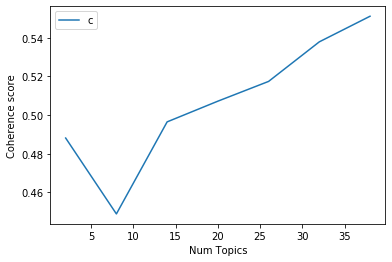

<Figure size 432x288 with 0 Axes>

In [0]:
#Model list and plot Coherence score against a number of topics
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
plt.savefig('Coherence score against a number of topics- Review_Text', dpi = 500)

In [0]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)